<a href="https://colab.research.google.com/github/fadlymirvan/stock-forecasting/blob/main/stock_forecasting_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import yfinance as yf
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as pdr

In [3]:
!python --version

Python 3.10.11


Cannot Scrap Data From Google Colab

In [ ]:
url='https://investasi.kontan.co.id/news/daftar-saham-lq45-periode-agustus-2022-januari-2023'
url='https://www.imdb.com'
lq45=requests.get(url)
lq45.status_code

403

In [ ]:
soup_lq45=BeautifulSoup(lq45.text,'html.parser')
rows=soup_lq45.find_all('tr')
list_rows=[]
for row in rows:
    row_td=row.find_all('td')
    str_cels=str(row_td)
    cleantext=BeautifulSoup(str_cels,'html.parser').get_text()
    list_rows.append(cleantext)

In [ ]:
list_rows

[]

In [4]:
# Output from scrap
list_rows = ['[ADRO, BFIN, GOTO, ITMG, SMGR]',
 '[AMRT, BMRI, HMSP, JPFA, TBIG]',
 '[ANTM, BRIS, HRUM, KLBF, TINS]',
 '[ARTO, BRPT, ICBP, MDKA, TLKM]',
 '[ASII, BUKA, INCO, MEDC, TOWR]',
 '[BBCA, CPIN, INDF, MIKA, TPIA]',
 '[BBNI, EMTK, INDY, MNCN, UNTR]',
 '[BBRI, ERAA, INKP, PGAS, UNVR]',
 '[BBTN, EXCL, INTP, PTBA, WIKA]']

In [5]:
raw_list_stocks = []
for row in list_rows:
    list_rows[0].strip('][').split(', ')
    raw_list_stocks.append(row.strip('][').split(', '))

In [6]:
list_stocks = [item for sublist in raw_list_stocks for item in sublist]

In [7]:
stocks_market_cap = []
for stock in list_stocks:
    stock_code = stock+'.jk'
    try:
        stock_info = yf.Ticker(stock_code).info
        temp_obj = {
            'stock_code': stock_code,
            'stock_name': stock_info['longName'],
            'market_cap': stock_info['marketCap'],
            'sector': stock_info['sector'],
            'industry': stock_info['industry']
        }
        stocks_market_cap.append(temp_obj)
    except:
        print("Data Not Found for ", stock_code)
        continue

In [8]:
newlist = sorted(stocks_market_cap, key=lambda d: -d['market_cap'])
top5_market_cap_df = pd.DataFrame(newlist[0:5])
bot5_market_cap_df = pd.DataFrame(newlist[-5:])

In [9]:
newlist

[{'stock_code': 'BBCA.jk',
  'stock_name': 'PT Bank Central Asia Tbk',
  'market_cap': 1127966322982912,
  'sector': 'Financial Services',
  'industry': 'Banks—Regional'},
 {'stock_code': 'BBRI.jk',
  'stock_name': 'PT Bank Rakyat Indonesia (Persero) Tbk',
  'market_cap': 837511643398144,
  'sector': 'Financial Services',
  'industry': 'Banks—Regional'},
 {'stock_code': 'BMRI.jk',
  'stock_name': 'PT Bank Mandiri (Persero) Tbk',
  'market_cap': 480666500202496,
  'sector': 'Financial Services',
  'industry': 'Banks—Regional'},
 {'stock_code': 'TLKM.jk',
  'stock_name': 'Perusahaan Perseroan (Persero) PT Telekomunikasi Indonesia Tbk',
  'market_cap': 416061266591744,
  'sector': 'Communication Services',
  'industry': 'Telecom Services'},
 {'stock_code': 'ASII.jk',
  'stock_name': 'PT Astra International Tbk',
  'market_cap': 267191744200704,
  'sector': 'Consumer Cyclical',
  'industry': 'Auto Parts'},
 {'stock_code': 'TPIA.jk',
  'stock_name': 'PT. Chandra Asri Petrochemical Tbk',
  '

In [10]:
top5_market_cap_df

,stock_code,stock_name,market_cap,sector,industry
0,BBCA.jk,PT Bank Central Asia Tbk,1127966322982912,Financial Services,Banks—Regional
1,BBRI.jk,PT Bank Rakyat Indonesia (Persero) Tbk,837511643398144,Financial Services,Banks—Regional
2,BMRI.jk,PT Bank Mandiri (Persero) Tbk,480666500202496,Financial Services,Banks—Regional
3,TLKM.jk,Perusahaan Perseroan (Persero) PT Telekomunika...,416061266591744,Communication Services,Telecom Services
4,ASII.jk,PT Astra International Tbk,267191744200704,Consumer Cyclical,Auto Parts


In [11]:
# Data saham dengan market cap tertinggi di setiap sektor
top_stock_market_cap_sector_df = pd.DataFrame(newlist).groupby(['sector']).head(1)
top_stock_market_cap_sector_df

,stock_code,stock_name,market_cap,sector,industry
0,BBCA.jk,PT Bank Central Asia Tbk,1127966322982912,Financial Services,Banks—Regional
3,TLKM.jk,Perusahaan Perseroan (Persero) PT Telekomunika...,416061266591744,Communication Services,Telecom Services
4,ASII.jk,PT Astra International Tbk,267191744200704,Consumer Cyclical,Auto Parts
5,TPIA.jk,PT. Chandra Asri Petrochemical Tbk,186864849911808,Basic Materials,Specialty Chemicals
6,UNVR.jk,PT Unilever Indonesia Tbk,173582495776768,Consumer Defensive,Household & Personal Products
10,GOTO.jk,PT GoTo Gojek Tokopedia Tbk,114086880739328,Technology,Software—Application
12,KLBF.jk,PT Kalbe Farma Tbk.,97599314984960,Healthcare,Drug Manufacturers—General
18,ADRO.jk,PT Adaro Energy Indonesia Tbk,64098586853376,Energy,Thermal Coal
29,PGAS.jk,PT Perusahaan Gas Negara Tbk,34180515758080,Utilities,Utilities—Regulated Gas
44,WIKA.jk,PT Wijaya Karya (Persero) Tbk,3408163241984,Industrials,Engineering & Construction


In [12]:
# Define Variable
list_top_stocks = top_stock_market_cap_sector_df['stock_code'].to_list()
start_date = datetime.datetime.strptime('01-01-2018', '%d-%m-%Y')
end_date = datetime.datetime.strptime('31-12-2022', '%d-%m-%Y')
date_df = pd.DataFrame()
dates = []
for i in range(1, (end_date.date() - start_date.date()).days):
    dates += [(start_date.date()+timedelta(i)).strftime('%Y-%m-%d')]

dates_df = pd.DataFrame(columns=['Date'], data=dates)
dates_df['Date'] = pd.to_datetime(dates_df['Date'])
dates_df

,Date
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-06
...,...
1819,2022-12-26
1820,2022-12-27
1821,2022-12-28
1822,2022-12-29


In [13]:
result_df = pd.DataFrame()
for stock in list_top_stocks:
    tempData = pd.DataFrame(yf.download(stock, start_date, end_date))
    tempData.reset_index(inplace=True)
    tempData['Code'] = stock
    tempData = tempData.merge(dates_df,how='right',on='Date').fillna(method='ffill')
    result_df = pd.concat([result_df, tempData])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
result_df.query("Code=='BBCA.jk'") # Get DF By Emit

,Date,Open,High,Low,Close,Adj Close,Volume,Code
0,2018-01-02,4380.0,4505.0,4365.0,4380.0,3965.378418,82303500.0,BBCA.jk
1,2018-01-03,4385.0,4390.0,4265.0,4380.0,3965.378418,68214000.0,BBCA.jk
2,2018-01-04,4380.0,4445.0,4380.0,4445.0,4024.225098,76567000.0,BBCA.jk
3,2018-01-05,4460.0,4480.0,4435.0,4450.0,4028.751709,65268000.0,BBCA.jk
4,2018-01-06,4460.0,4480.0,4435.0,4450.0,4028.751709,65268000.0,BBCA.jk
...,...,...,...,...,...,...,...,...
1819,2022-12-26,8500.0,8625.0,8500.0,8575.0,8406.959961,20495900.0,BBCA.jk
1820,2022-12-27,8600.0,8650.0,8575.0,8600.0,8431.469727,27193800.0,BBCA.jk
1821,2022-12-28,8650.0,8650.0,8550.0,8650.0,8480.490234,40420200.0,BBCA.jk
1822,2022-12-29,8525.0,8600.0,8500.0,8575.0,8406.959961,47020900.0,BBCA.jk


In [15]:
result_df.reset_index(drop=True)

,Date,Open,High,Low,Close,Adj Close,Volume,Code
0,2018-01-02,4380.0,4505.0,4365.0,4380.0,3965.378418,82303500.0,BBCA.jk
1,2018-01-03,4385.0,4390.0,4265.0,4380.0,3965.378418,68214000.0,BBCA.jk
2,2018-01-04,4380.0,4445.0,4380.0,4445.0,4024.225098,76567000.0,BBCA.jk
3,2018-01-05,4460.0,4480.0,4435.0,4450.0,4028.751709,65268000.0,BBCA.jk
4,2018-01-06,4460.0,4480.0,4435.0,4450.0,4028.751709,65268000.0,BBCA.jk
...,...,...,...,...,...,...,...,...
18235,2022-12-26,835.0,835.0,810.0,815.0,815.000000,6300700.0,WIKA.jk
18236,2022-12-27,820.0,825.0,810.0,810.0,810.000000,3009400.0,WIKA.jk
18237,2022-12-28,815.0,815.0,800.0,810.0,810.000000,7964200.0,WIKA.jk
18238,2022-12-29,810.0,820.0,805.0,810.0,810.000000,2569200.0,WIKA.jk


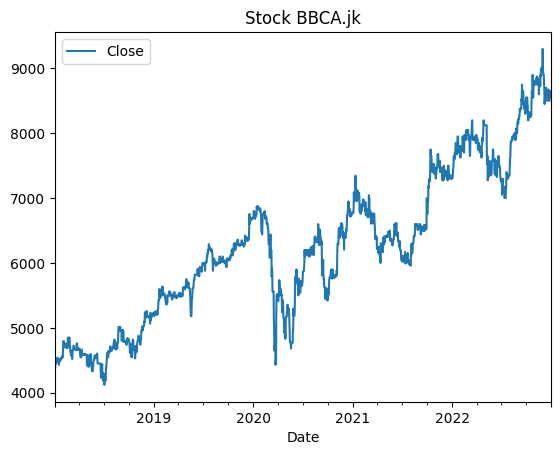

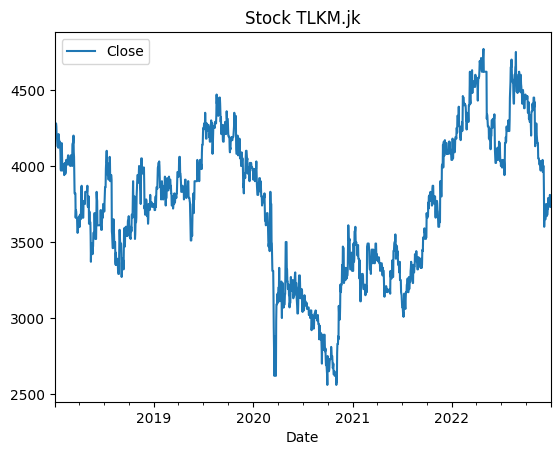

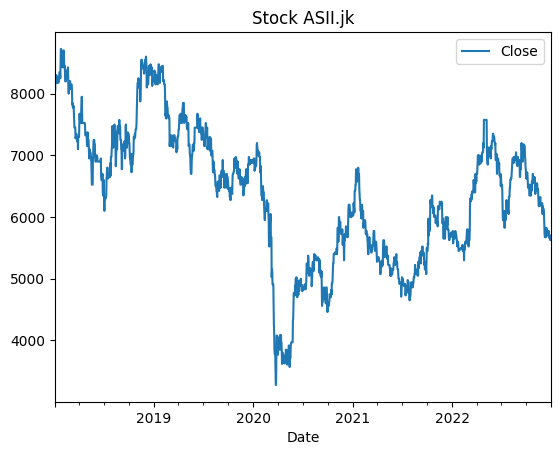

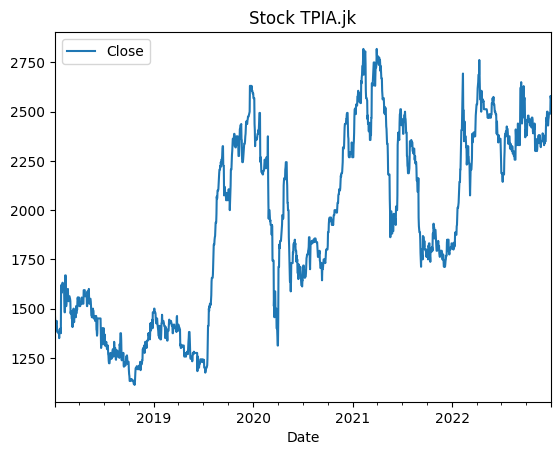

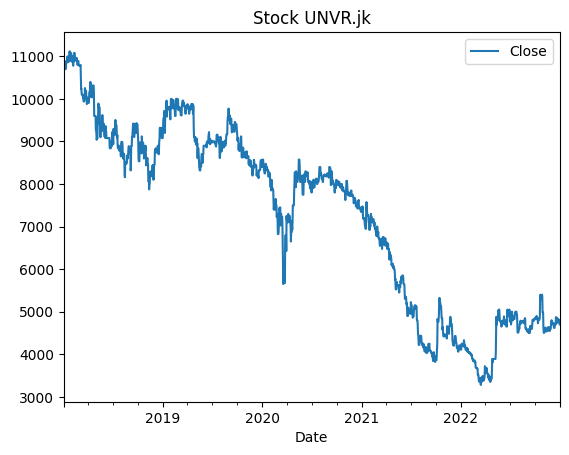

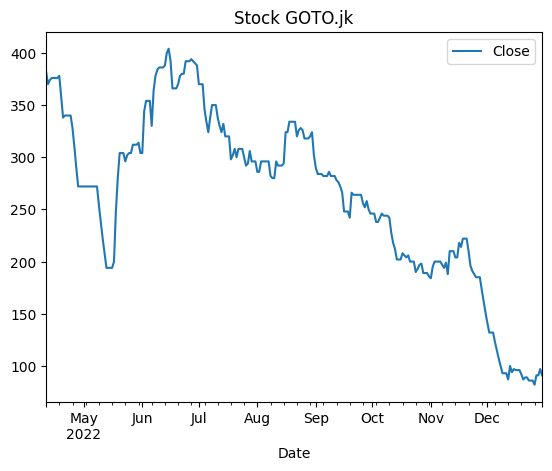

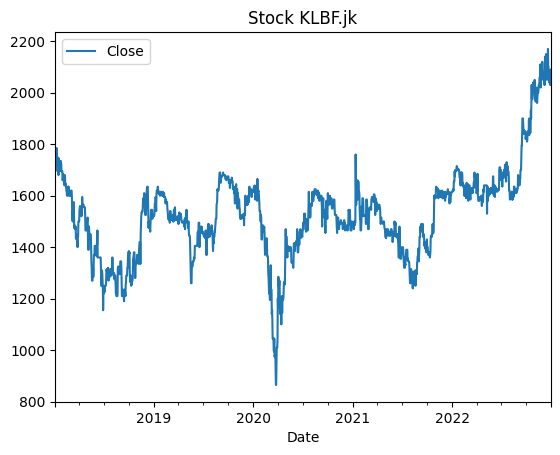

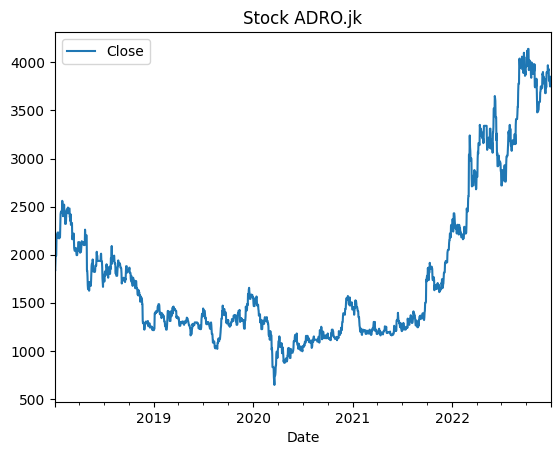

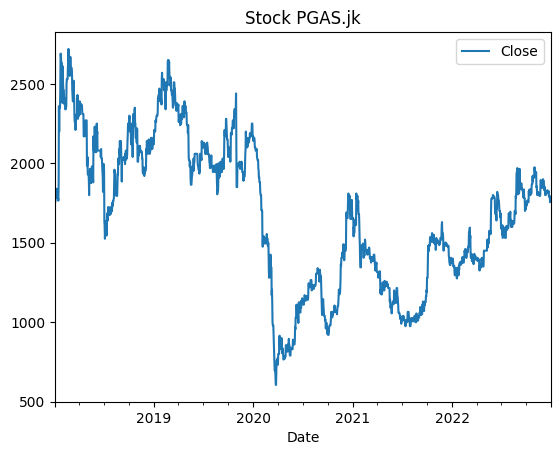

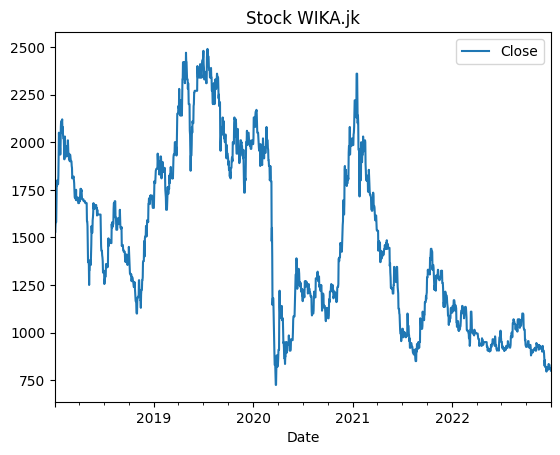

In [16]:
for stock in list_top_stocks:
    result_df.query(f"Code=='{stock}'").plot(x='Date',y='Close',kind='line', title=f"Stock {stock}")

# N-BEATS

In [17]:
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape, rmse
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20,15)
import pandas as pd

<ipython-input-17-fcdec217b472>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [18]:
series_stock=TimeSeries.from_dataframe(result_df.query("Code=='BBCA.jk'"), time_col='Date', value_cols='Close')
series_stock

<TimeSeries (DataArray) (Date: 1824, component: 1, sample: 1)>
array([[[4380.]],

       [[4380.]],

       [[4445.]],

       ...,

       [[8650.]],

       [[8575.]],

       [[8550.]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2018-01-02 2018-01-03 ... 2022-12-30
  * component  (component) object 'Close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

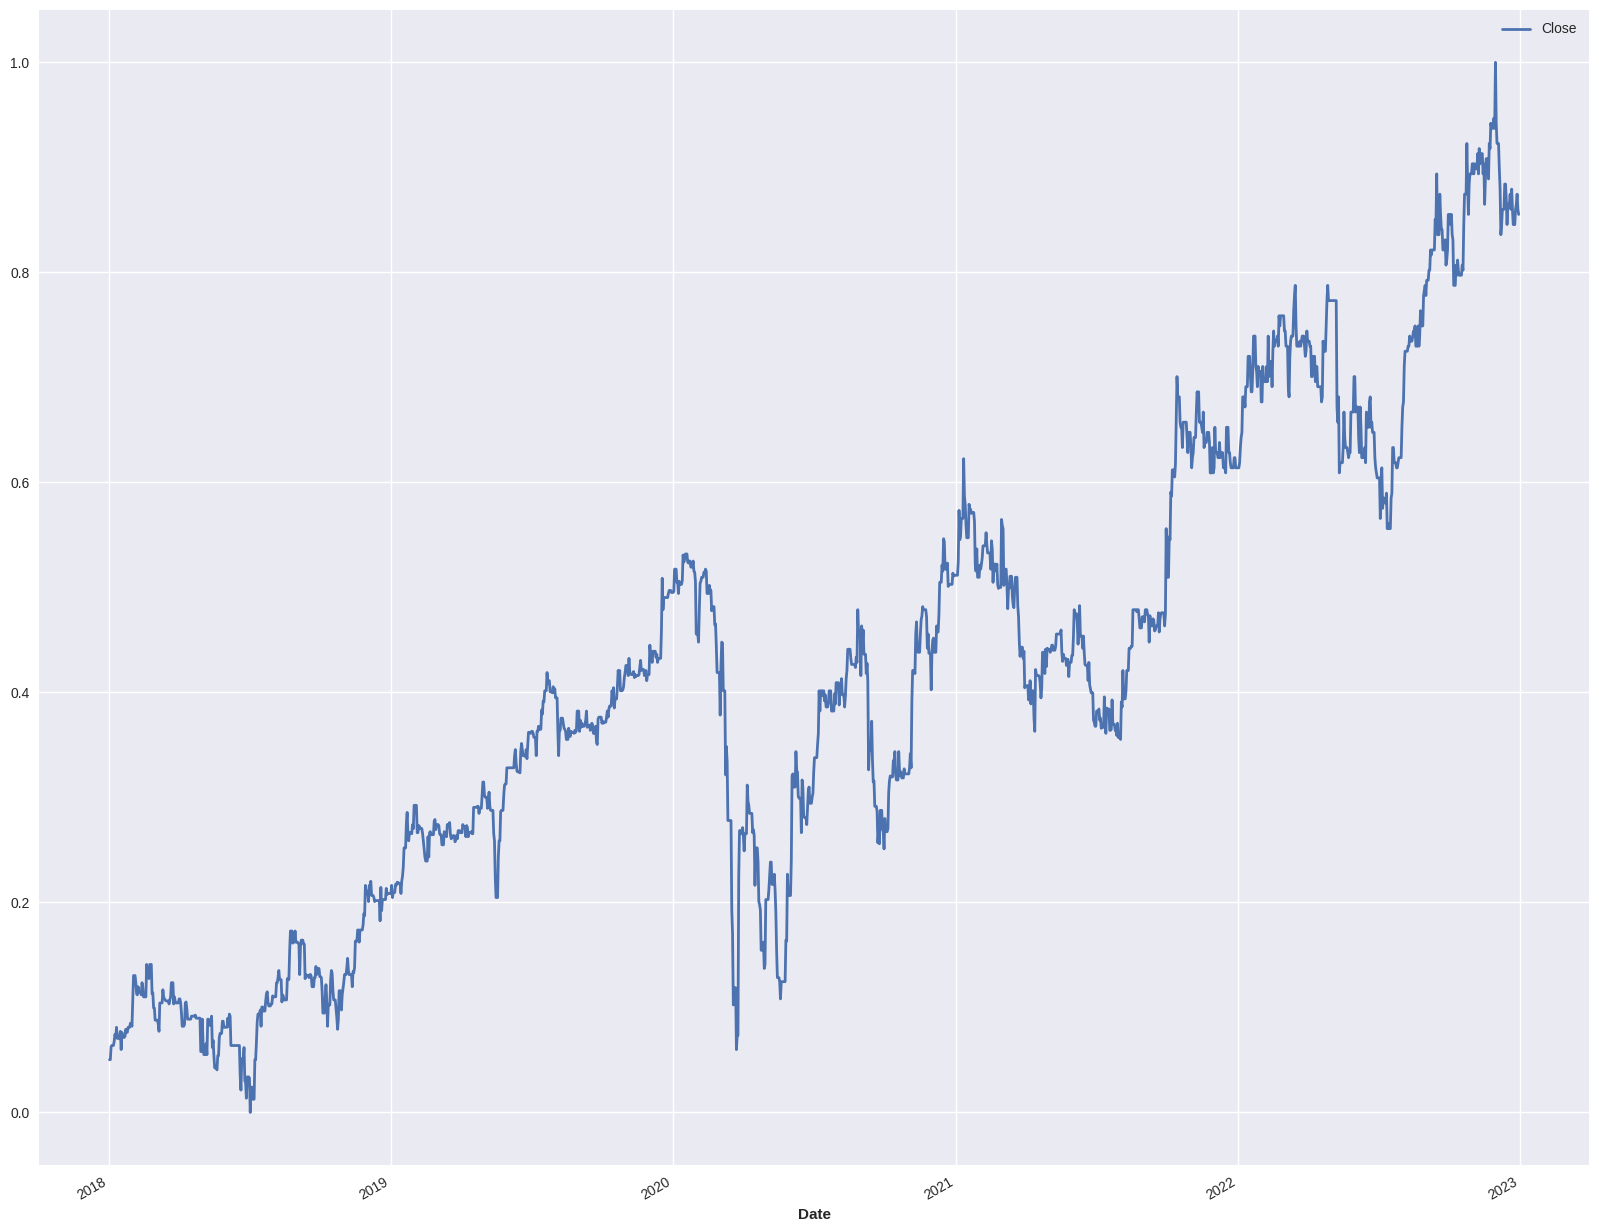

In [19]:
scaler_stock = Scaler()
stock_scaled = scaler_stock.fit_transform(series_stock)
stock_scaled.plot(label='Close')
plt.legend(loc='best');

In [ ]:
print(int(len(stock_scaled)*80/100))
print(int(len(stock_scaled)*20/100))

1459
364


In [28]:
train_stock, val_stock = stock_scaled[:1459], stock_scaled[1459:]
model = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
)
model.fit(train_stock, val_series=val_stock, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.1 M 
---------------------------------------------------
8.1 M     Trainable params
2.7 K     Non-trainable params
8.1 M     Total params
32.368    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(generic_architecture=True, num_stacks=10, num_blocks=1, num_layers=4, layer_widths=512, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=30, output_chunk_length=7, n_epochs=100, nr_epochs_val_period=1, batch_size=800, model_name=nbeats_run)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

MAPE :15.27249978835129
RMSE :0.12291799145164843


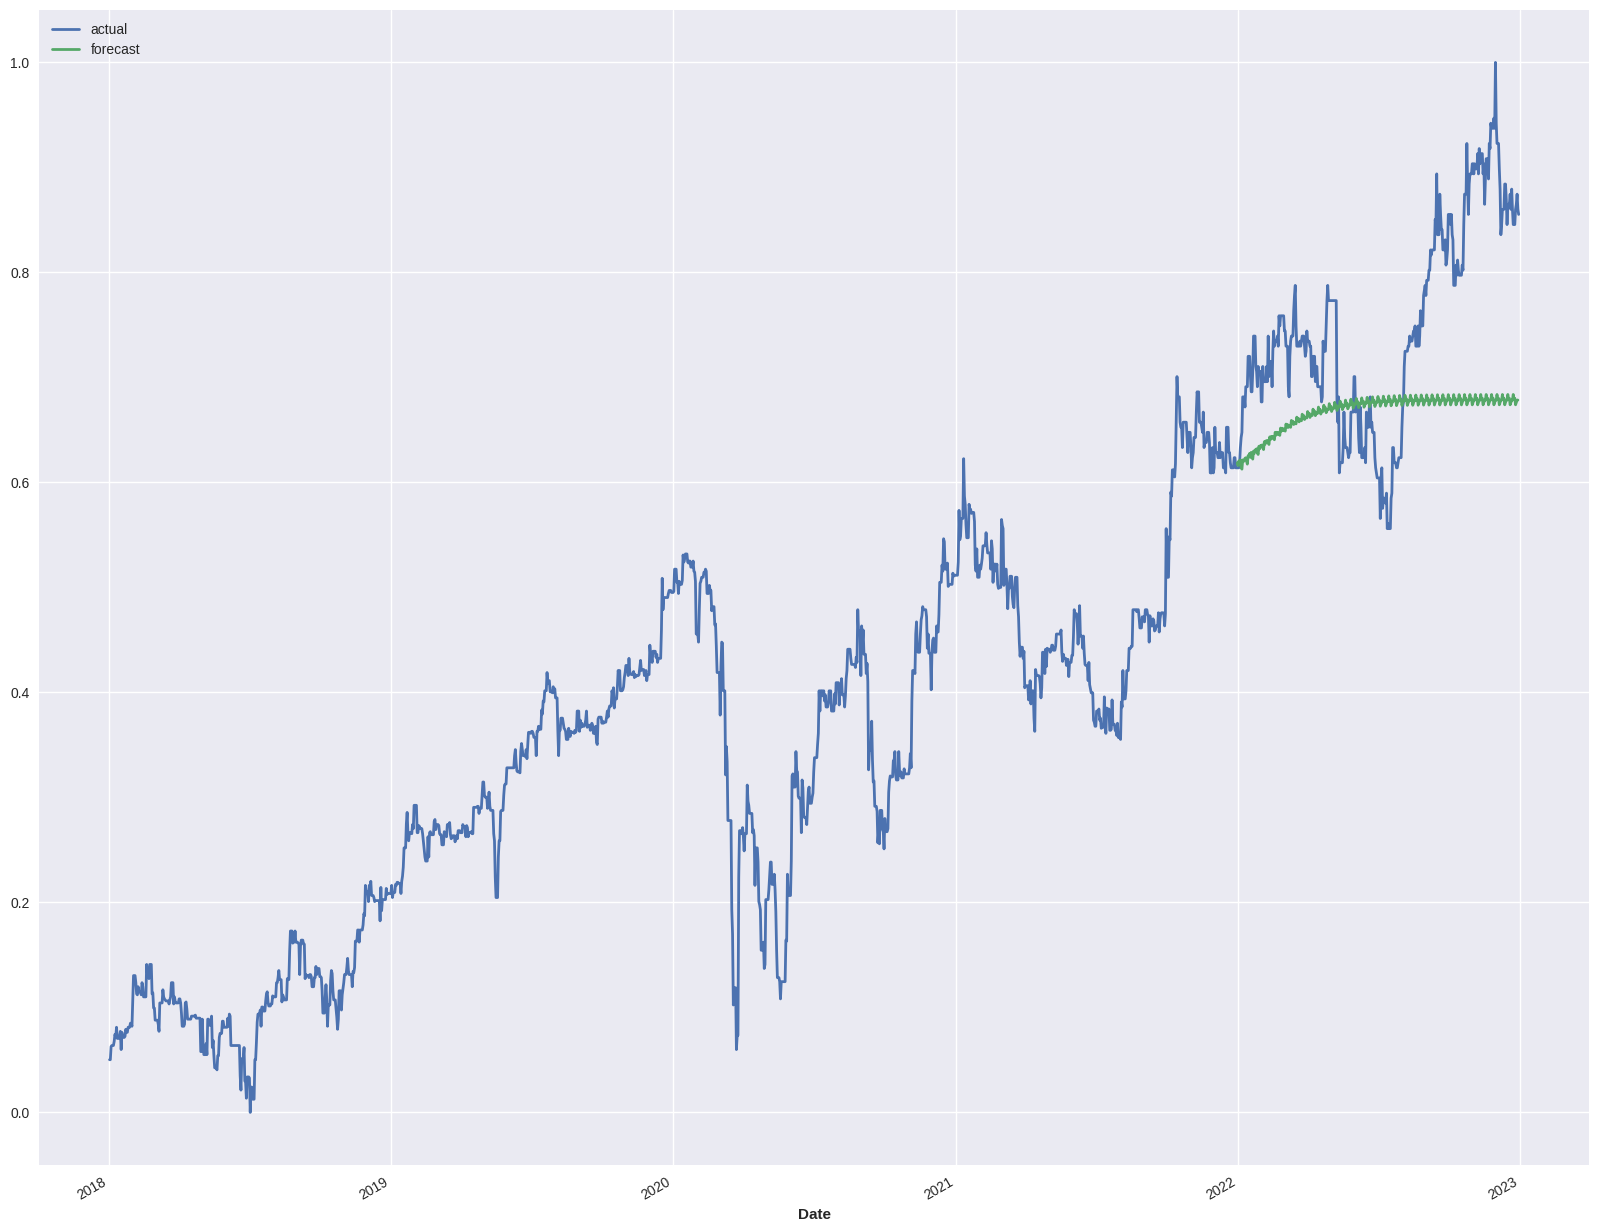

In [29]:
pred = model.predict(n=364, series=train_stock)
stock_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend()
print(f'MAPE :{mape(pred,val_stock)}')
print(f'RMSE :{rmse(pred,val_stock)}')